### Otras formas

In [66]:
import os

# Filtrar archivos no deseados
def is_valid_file(file):
    return file.endswith('.txt')  # O cualquier otro filtro que necesites

# Directorio actual
current_dir = os.getcwd()

# Directorios para Keynes y Hayek
assets_dir = os.path.join(current_dir, 'assets')

# Crear un diccionario para almacenar los textos
texts = {'keynes': [], 'hayek': []}

# Codificaciones a intentar
encodings = ['utf-8', 'latin1', 'ISO-8859-1']

def read_file(file_path):
    # Leer el archivo en modo binario
    with open(file_path, 'rb') as file:
        raw_data = file.read()
        
    # Intentar decodificar el contenido con diferentes codificaciones
    for encoding in encodings:
        try:
            return raw_data.decode(encoding)
        except (UnicodeDecodeError, TypeError):
            continue
    raise ValueError("No se pudo decodificar el archivo con las codificaciones intentadas.")

# Leer los archivos de texto en el directorio
for filename in os.listdir(assets_dir):
    if is_valid_file(filename):
        # Determinar el autor basado en el nombre del archivo
        if 'keynes' in filename.lower():
            author = 'keynes'
        elif 'hayek' in filename.lower():
            author = 'hayek'
        else:
            continue

        # Leer el archivo y agregar al diccionario
        file_path = os.path.join(assets_dir, filename)
        try:
            content = read_file(file_path)
            texts[author].append(content)
        except ValueError as e:
            print(f"Error al leer el archivo {filename}: {e}")

# Verificar que los textos han sido cargados
print(f"Textos de Keynes: {len(texts['keynes'])} archivos")
print(f"Textos de Hayek: {len(texts['hayek'])} archivos")

# Opcional: Mostrar los primeros textos cargados para verificar
print("Primer texto de Keynes:", texts['keynes'][0][:200] if texts['keynes'] else "No hay textos de Keynes")
print("Primer texto de Hayek:", texts['hayek'][0][:200] if texts['hayek'] else "No hay textos de Hayek")


Textos de Keynes: 5 archivos
Textos de Hayek: 7 archivos
Primer texto de Keynes: SECCIÓN DE OBRAS DE ECONOMÍA

TEORÍA GENERAL DE LA OCUPACIÓN,

EL INTERÉS Y EL DINERO

2

Traducción de

EDUARDO HORNEDO



Revisión de

ROBERTO REYES MAZZONI

3

JOHN MAYNARD KEYN
Primer texto de Hayek: Principios de Economía Política





Carl Menger





INTRODUCCIÓN

de F. A. Hayek

La historia de la economía política es rica en ejemplos de precursores olvidados, cuya obra no despertó ningún eco e


In [68]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, SnowballStemmer
import unicodedata

# Cargar stopwords en español
stop_words = set(stopwords.words('spanish'))

# Inicializar el stemmer
#stemmer = SnowballStemmer('spanish') no vamos a utilizarlo, pero si lo hiciese solo dejaría la raíz de cada palabra

def preprocess(text):
    # Normalizar el texto
    text = text.lower()
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('ascii')
    
    # Eliminar caracteres no alfabéticos y puntuación
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Tokenizar el texto
    tokens = word_tokenize(text, language='spanish')
    
    # Eliminar stopwords y palabras cortas
    tokens = [word for word in tokens if word not in stop_words and len(word) > 3]
    
    return tokens

# Ejemplo de uso
keynes_texts_processed = [preprocess(text) for text in texts['keynes']]
hayek_texts_processed = [preprocess(text) for text in texts['hayek']]

# Mostrar las 10 primeras palabras de los textos procesados para Keynes
print("Primeras 10 palabras procesadas en los textos de Keynes:")
for text in keynes_texts_processed[:2]:  # Considerando solo los 2 primeros textos para la muestra
    print(text[:10])

# Mostrar las 10 primeras palabras de los textos procesados para Hayek
print("\nPrimeras 10 palabras procesadas en los textos de Hayek:")
for text in hayek_texts_processed[:2]:  # Considerando solo los 2 primeros textos para la muestra
    print(text[:10])



Primeras 10 palabras procesadas en los textos de Keynes:
['seccion', 'obras', 'economia', 'teoria', 'general', 'ocupacion', 'interes', 'dinero', 'traduccion', 'eduardo']
['lrtrqotjcciox', 'denuncia', 'impotencia', 'llamados', 'expertos', 'explierz', 'siroaci', 'expertos', 'ciencia', 'economia']

Primeras 10 palabras procesadas en los textos de Hayek:
['principios', 'economia', 'politica', 'carl', 'menger', 'introduccion', 'hayek', 'historia', 'economia', 'politica']
['folio', 'titulo', 'original', 'denationalisation', 'money', 'analysis', 'theory', 'practice', 'concurrent', 'currencies']


1. Importación de Módulos

python

import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import unicodedata

    re: Módulo para trabajar con expresiones regulares, útil para buscar y manipular texto.
    stopwords: De la librería NLTK, carga una lista de palabras comunes (como "el", "la", "y") que usualmente se filtran en tareas de procesamiento de lenguaje natural.
    word_tokenize: Función de NLTK para dividir el texto en palabras (tokens).
    unicodedata: Módulo para manejar caracteres Unicode, útil para normalizar texto eliminando acentos y otros caracteres especiales.

2. Carga de Stopwords

python

stop_words = set(stopwords.words('spanish'))

    stop_words: Conjunto de palabras comunes en español que serán eliminadas durante el procesamiento del texto para centrarse en palabras más significativas.

3. Definición de la Función preprocess

python

def preprocess(text):
    # Normalizar el texto
    text = text.lower()
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('ascii')
    
    # Eliminar caracteres no alfabéticos y puntuación
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Tokenizar el texto
    tokens = word_tokenize(text, language='spanish')
    
    # Eliminar stopwords y palabras cortas
    tokens = [word for word in tokens if word not in stop_words and len(word) > 3]
    
    return tokens

    text = text.lower(): Convierte todo el texto a minúsculas para una comparación uniforme.
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('ascii'): Normaliza el texto eliminando acentos y caracteres especiales. Por ejemplo, "árbol" se convierte en "arbol".
    text = re.sub(r'[^a-zA-Z\s]', '', text): Elimina cualquier cosa que no sea una letra o un espacio (ej., puntuación, números).
    tokens = word_tokenize(text, language='spanish'): Divide el texto en palabras individuales (tokens).
    tokens = [word for word in tokens if word not in stop_words and len(word) > 3]: Elimina las stopwords y las palabras con menos de 4 caracteres, dejando solo palabras relevantes y suficientemente largas.
    return tokens: Devuelve la lista de palabras procesadas.

4. Procesamiento de los Textos

python

keynes_texts_processed = [preprocess(text) for text in texts['keynes']]
hayek_texts_processed = [preprocess(text) for text in texts['hayek']]

    keynes_texts_processed y hayek_texts_processed: Listas que contienen los textos de Keynes y Hayek respectivamente, pero ya procesados (limpios y tokenizados).

5. Visualización de las Palabras Procesadas

python

# Mostrar las 10 primeras palabras procesadas en los textos de Keynes
print("Primeras 10 palabras procesadas en los textos de Keynes:")
for text in keynes_texts_processed[:2]:
    print(text[:10])

# Mostrar las 10 primeras palabras procesadas en los textos de Hayek
print("\nPrimeras 10 palabras procesadas en los textos de Hayek:")
for text in hayek_texts_processed[:2]:
    print(text[:10])

    print("Primeras 10 palabras procesadas en los textos de Keynes:"): Imprime un encabezado indicando que se mostrarán las primeras 10 palabras de los textos de Keynes.
    for text in keynes_texts_processed[:2]:: Recorre los primeros 2 textos procesados de Keynes.
    print(text[:10]): Imprime las primeras 10 palabras de cada texto.
    Se hace lo mismo para los textos de Hayek.

Propósito del Código

El código está diseñado para cargar, limpiar y tokenizar textos de dos autores (Keynes y Hayek). Luego, imprime una pequeña muestra de las primeras palabras procesadas de cada autor, lo que permite verificar que el preprocesamiento ha funcionado correctamente. Al reducir la cantidad de datos mostrados, se evita sobrecargar la consola y se facilita la revisión de los resultados.

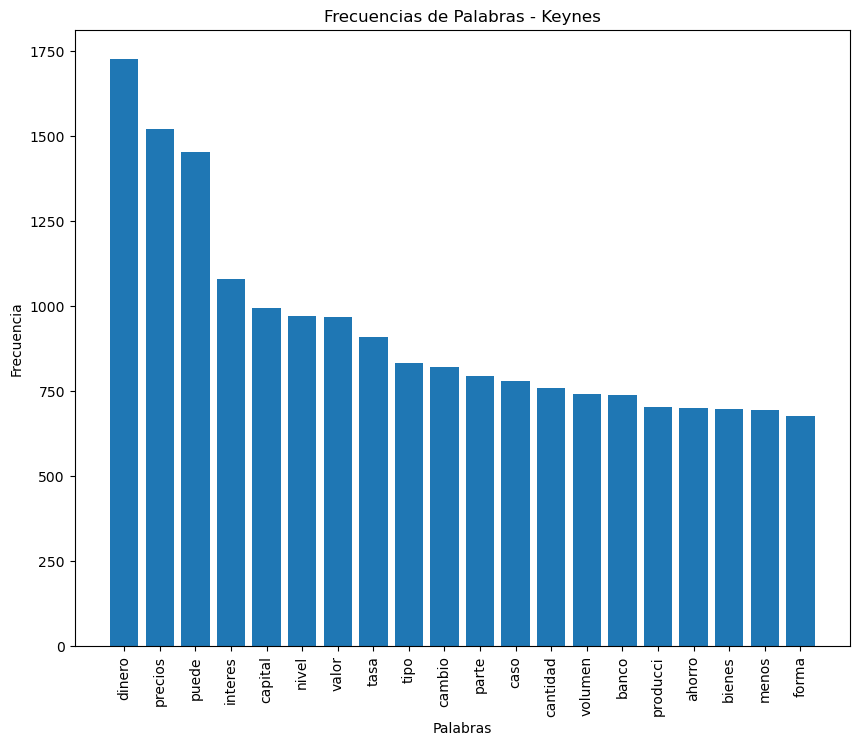

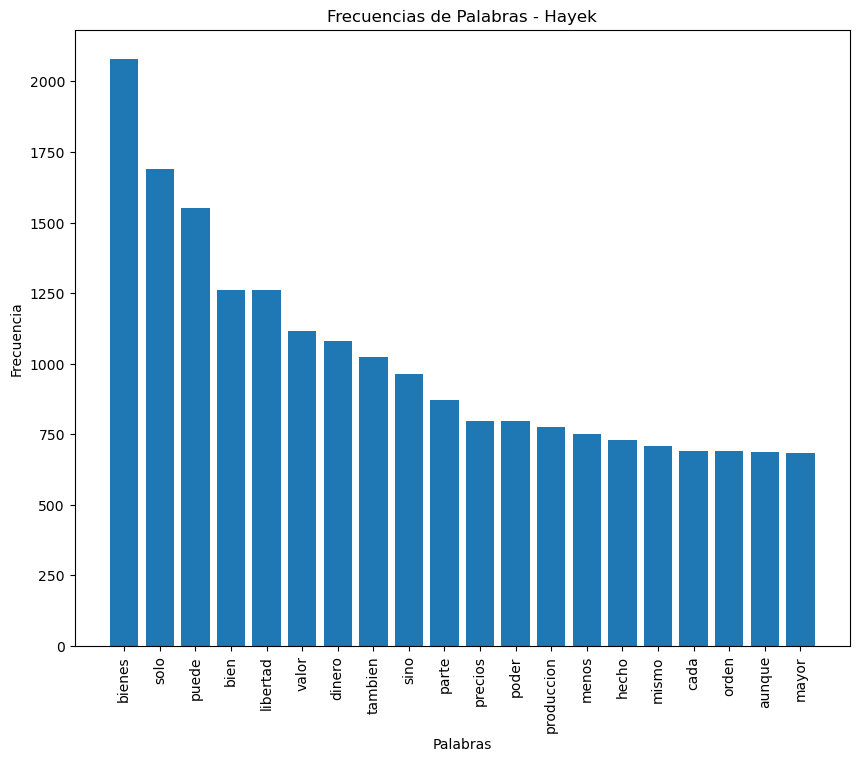

In [70]:
from collections import Counter
import matplotlib.pyplot as plt

def calculate_word_frequencies(tokens):
    # Contar la frecuencia de cada palabra
    word_freq = Counter(tokens)
    return word_freq

def plot_word_frequencies(word_freq, title):
    # Obtener las 20 palabras más frecuentes
    most_common_words = word_freq.most_common(20)
    words, counts = zip(*most_common_words)
    
    # Crear un gráfico de barras
    plt.figure(figsize=(10, 8))
    plt.bar(words, counts)
    plt.xticks(rotation=90)
    plt.title(f'Frecuencias de Palabras - {title}')
    plt.xlabel('Palabras')
    plt.ylabel('Frecuencia')
    plt.show()

# Calcular frecuencias de palabras para cada autor
keynes_word_freq = calculate_word_frequencies([word for text in keynes_texts_processed for word in text])
hayek_word_freq = calculate_word_frequencies([word for text in hayek_texts_processed for word in text])

# Graficar frecuencias de palabras
plot_word_frequencies(keynes_word_freq, 'Keynes')
plot_word_frequencies(hayek_word_freq, 'Hayek')


Explicación del Código

    calculate_word_frequencies: Esta función toma una lista de tokens y utiliza Counter para contar la frecuencia de cada palabra.
    plot_word_frequencies: Esta función toma el conteo de palabras y el título para crear un gráfico de barras que muestra las 20 palabras más frecuentes.

Pasos a Seguir:

    Preprocesar Textos: Asegúrate de haber preprocesado los textos usando la función preprocess como se mostró anteriormente.
    Calcular Frecuencias: Usa la función calculate_word_frequencies para contar las palabras en los textos preprocesados de cada autor.
    Graficar Resultados: Usa la función plot_word_frequencies para visualizar las frecuencias de palabras en gráficos.

# sin eliminar palabras vacías calculamos la frecuencia

In [84]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Unir todos los textos de un autor en un solo documento
joined_texts = {author: ' '.join(texts[author]) for author in texts}

# Aplicar TF-IDF con palabras vacías
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(joined_texts.values())

# Extraer las palabras más importantes según TF-IDF para cada autor
terms = vectorizer.get_feature_names_out()
important_words_sin = {author: [(terms[idx], score) for idx, score in enumerate(tfidf_matrix.toarray()[i])] for i, author in enumerate(joined_texts)}

# Mostrar resultados
for author, words in important_words_sin.items():
    print(f"Palabras más importantes para {author}:")
    for word, score in sorted(words, key=lambda x: x[1], reverse=True)[:10]:
        print(f"{word}: {score:.4f}")
    print("\n")


Palabras más importantes para keynes:
de: 0.6963
la: 0.3535
que: 0.3085
en: 0.2833
el: 0.2505
los: 0.1904
del: 0.1228
las: 0.1084
por: 0.1027
se: 0.0948


Palabras más importantes para hayek:
de: 0.6517
la: 0.4017
que: 0.3645
en: 0.2553
el: 0.2287
los: 0.1969
las: 0.1171
se: 0.1084
del: 0.1035
no: 0.1009




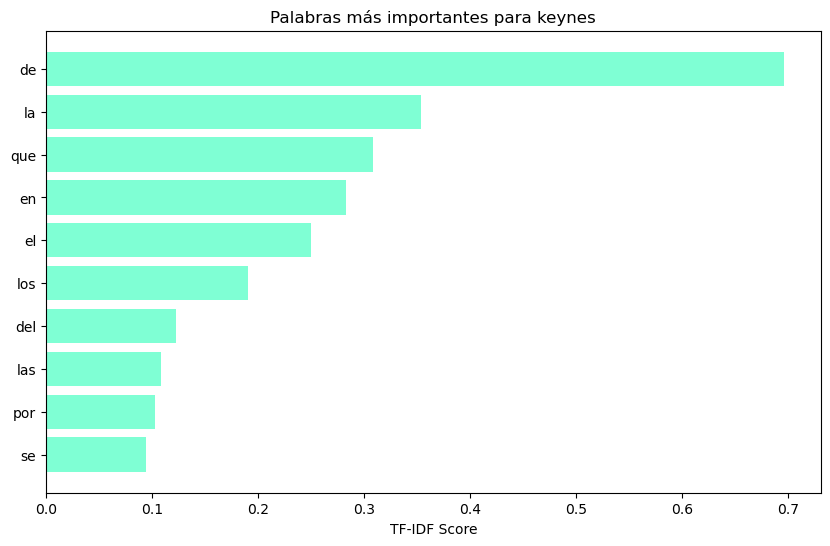

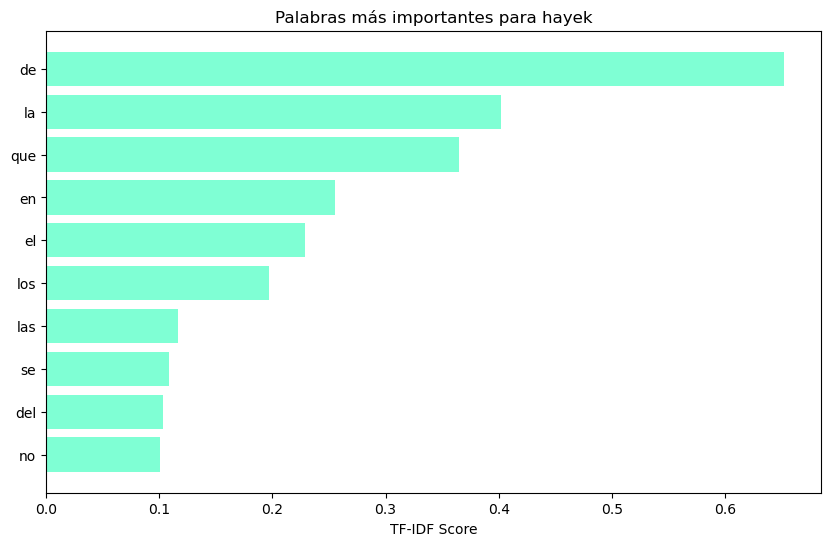

In [108]:
# Función para graficar las palabras más importantes de un autor
# Graficar palabras más importantes para cada autor
for author, words in important_words_sin.items():
    # Extraer palabras y puntuaciones
    words, scores = zip(*sorted(words, key=lambda x: x[1], reverse=True)[:10])
    
    # Crear la figura
    plt.figure(figsize=(10, 6))
    plt.barh(words, scores, color='aquamarine')
    plt.xlabel('TF-IDF Score')
    plt.title(f'Palabras más importantes para {author}')
    plt.gca().invert_yaxis()  # Invertir el eje y para mostrar las palabras con mayor puntuación en la parte superior
    plt.show()

1. Unir todos los textos de un autor en un solo documento
       Propósito: Combina todos los textos asociados a un autor en un solo string por autor.
    texts[author]: Contiene una lista de textos para cada autor.
    ' '.join(texts[author]): Une todos los textos de un autor en un solo documento de texto, separado por espacios.

2. Aplicar TF-IDF
       TfidfVectorizer(): Es un objeto de sklearn que convierte un conjunto de documentos en una matriz de TF-IDF.
    fit_transform(joined_texts.values()): Ajusta el vectorizador a los textos unidos y los transforma en una matriz en la que cada fila representa un autor y cada columna una palabra. Los valores en la matriz son los puntajes TF-IDF, que miden la importancia de una palabra en el conjunto de documentos.

3. Extraer las palabras más importantes según TF-IDF para cada autor
       get_feature_names_out(): Obtiene la lista de todas las palabras (o términos) identificadas por el vectorizador.
    tfidf_matrix.toarray(): Convierte la matriz TF-IDF en un array de NumPy para acceder a los valores de manera más conveniente.
    important_words: Es un diccionario que asocia cada autor con una lista de tuplas. Cada tupla contiene una palabra (del autor) y su correspondiente puntaje TF-IDF.

4. Mostrar resultados
   Propósito: Muestra las 10 palabras más importantes para cada autor basadas en sus puntajes TF-IDF.
sorted(words, key=lambda x: x[1], reverse=True)[:10]: Ordena las palabras por su puntaje TF-IDF de manera descendente y selecciona las 10 más altas.
print(f"{word}: {score:.4f}"): Imprime cada palabra junto con su puntaje TF-IDF, formateado a cuatro decimales.

In [142]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import numpy as np

# Cargar stopwords en español desde NLTK
stop_words = list(stopwords.words('spanish')) 

# Unir todos los textos de un autor en un solo documento
joined_texts = {author: ' '.join(texts[author]) for author in texts}

# Aplicar TF-IDF con stopwords personalizadas
vectorizer = TfidfVectorizer(
    stop_words=list(stopwords.words('spanish')) + ['aunque', 'mayor', 'sino', 'puede', 'sólo', 'parte', 'menos', 'tipo', 'mismo', 'hecho', 'caso', 'cambio', 'cada', 'orden'],  # Añadir palabras personalizadas
    token_pattern=r'\b\w{4,}\b'  # Palabras de al menos 4 caracteres
)

#vectorizer = TfidfVectorizer(stop_words=stop_words, token_pattern=r'\b\w{4,}\b')  # Palabras de al menos 4 caracteres
tfidf_matrix = vectorizer.fit_transform(joined_texts.values())

# Extraer las palabras más importantes según TF-IDF para cada autor
terms = vectorizer.get_feature_names_out()
important_words = {
    author: [
        (terms[idx], score) for idx, score in enumerate(tfidf_matrix[i].toarray()[0]) if score > 0
    ] for i, author in enumerate(joined_texts)
}

# Mostrar resultados
for author, words in important_words.items():
    print(f"Palabras más importantes para {author}:")
    for word, score in sorted(words, key=lambda x: x[1], reverse=True)[:10]:
        print(f"{word}: {score:.4f}")
    print("\n")

Palabras más importantes para keynes:
dinero: 0.2607
precios: 0.2276
interés: 0.1643
capital: 0.1503
valor: 0.1497
nivel: 0.1493
tasa: 0.1441
producci: 0.1402
cantidad: 0.1144
volumen: 0.1112


Palabras más importantes para hayek:
bienes: 0.3016
bien: 0.1834
libertad: 0.1822
valor: 0.1620
dinero: 0.1574
poder: 0.1157
precios: 0.1156
producción: 0.1124
tiempo: 0.0976
sociedad: 0.0966




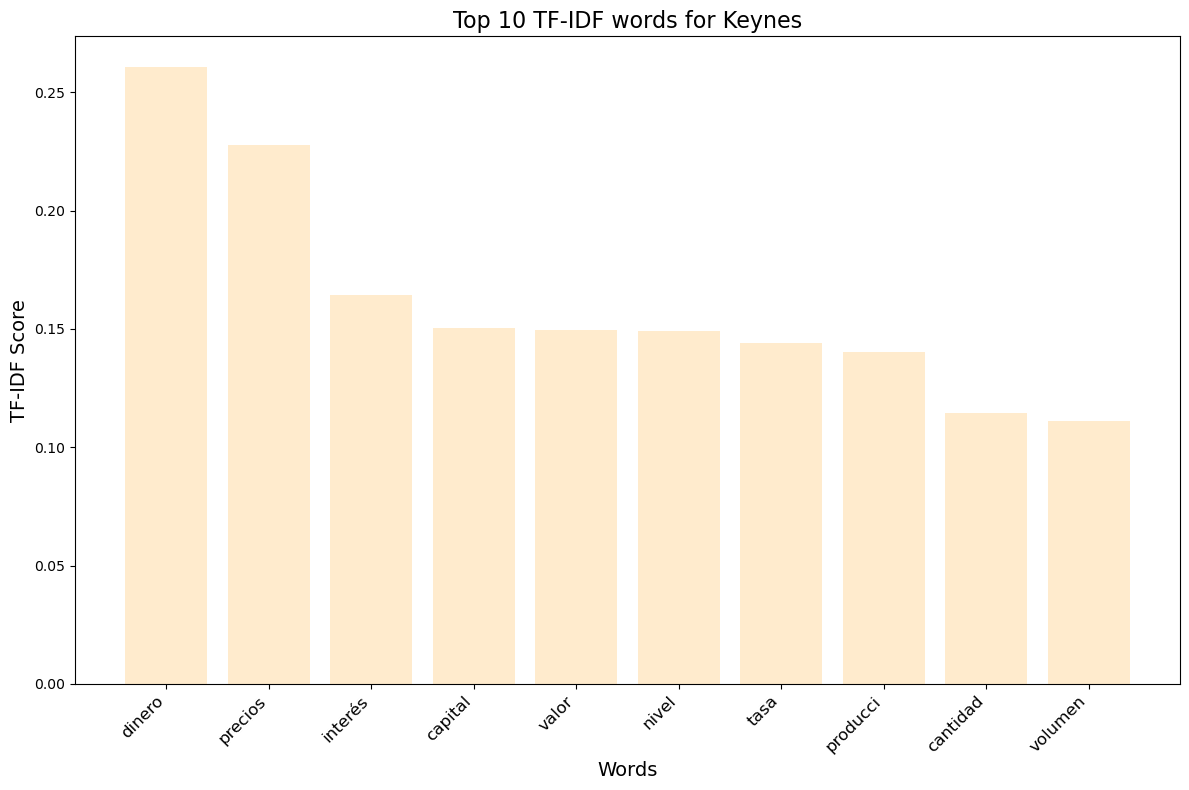

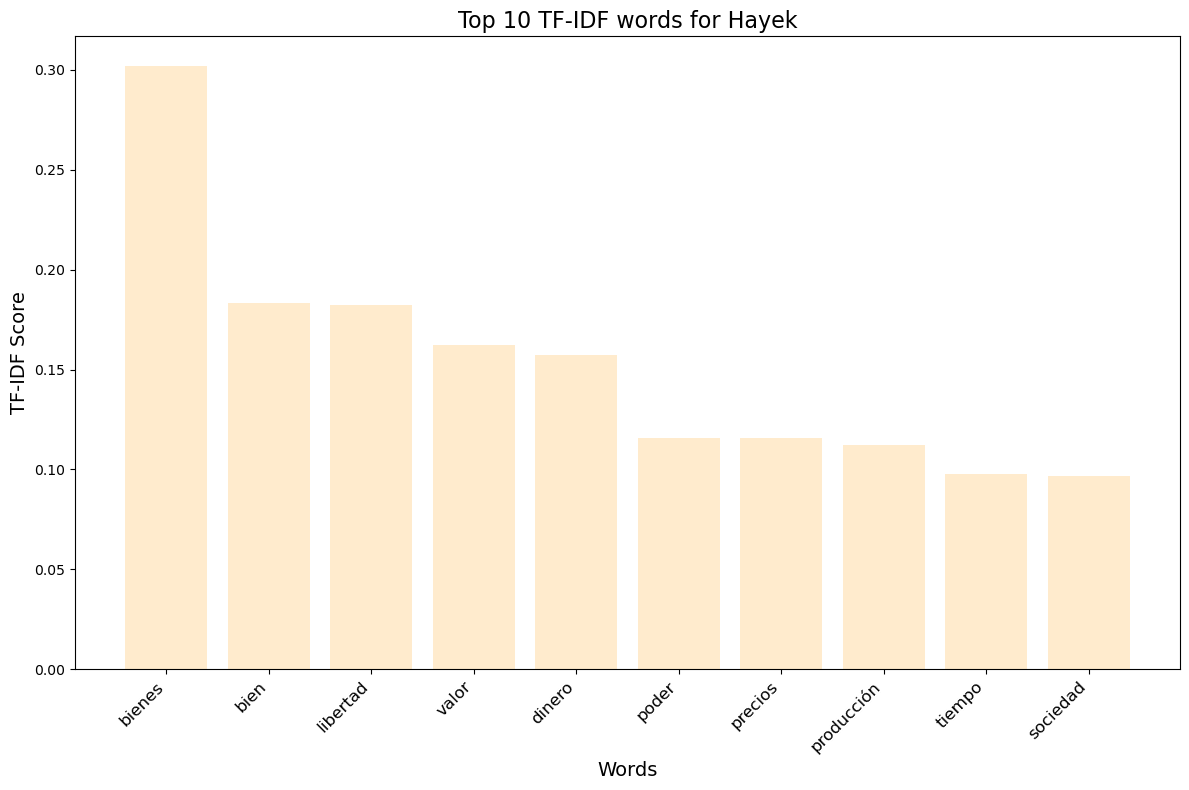

In [144]:
# Función para graficar las palabras más importantes de un autor
def plot_important_words(author, important_words, top_n=10):
    words_scores = important_words.get(author, [])
    if words_scores:
        # Ordenar las palabras por su puntuación TF-IDF
        sorted_words = sorted(words_scores, key=lambda x: x[1], reverse=True)[:top_n]
        words, scores = zip(*sorted_words)
        
        # Crear el gráfico de barras
        plt.figure(figsize=(12, 8))  # Ajustar el tamaño del gráfico
        plt.bar(words, scores, color='BlanchedAlmond')
        plt.title(f"Top {top_n} TF-IDF words for {author.capitalize()}", fontsize=16)
        plt.xlabel("Words", fontsize=14)
        plt.ylabel("TF-IDF Score", fontsize=14)
        plt.xticks(rotation=45, ha='right', fontsize=12)
        plt.tight_layout()  # Ajustar el diseño para que no se superpongan elementos
        plt.show()
    else:
        print(f"No hay palabras importantes para {author}")

# Ejemplo de uso
for author in important_words:
    plot_important_words(author, important_words)

Explicación

    Función de Graficado:
        plot_important_words toma el nombre de un autor y sus palabras importantes.
        Ordena las palabras por su puntuación TF-IDF y grafica las top n palabras usando un gráfico de barras.

    Uso:
        Se recorre cada autor en important_words y se grafica su información.

Este código debería proporcionarte gráficos que muestran las palabras más importantes para cada autor, basadas en la puntuación TF-IDF calculada. Ajusta el tamaño del gráfico, el número de palabras mostradas, y los estilos según sea necesario.

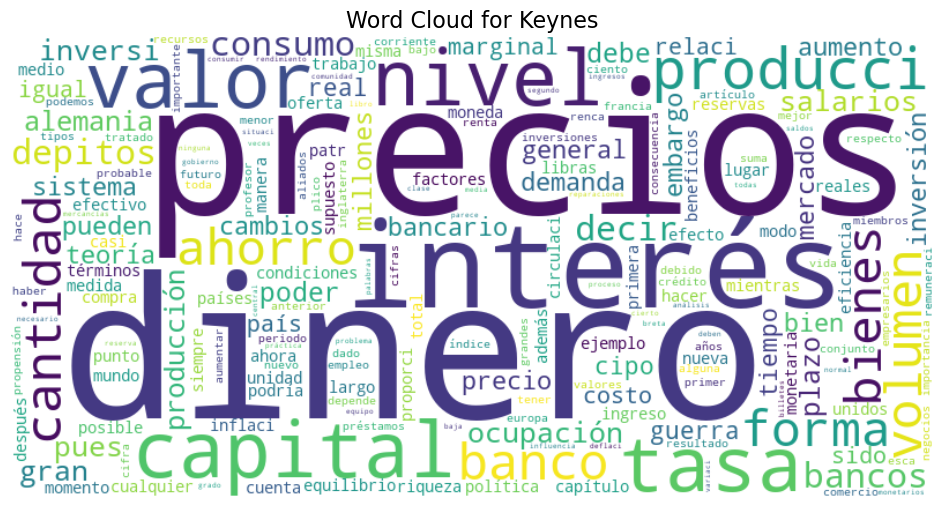

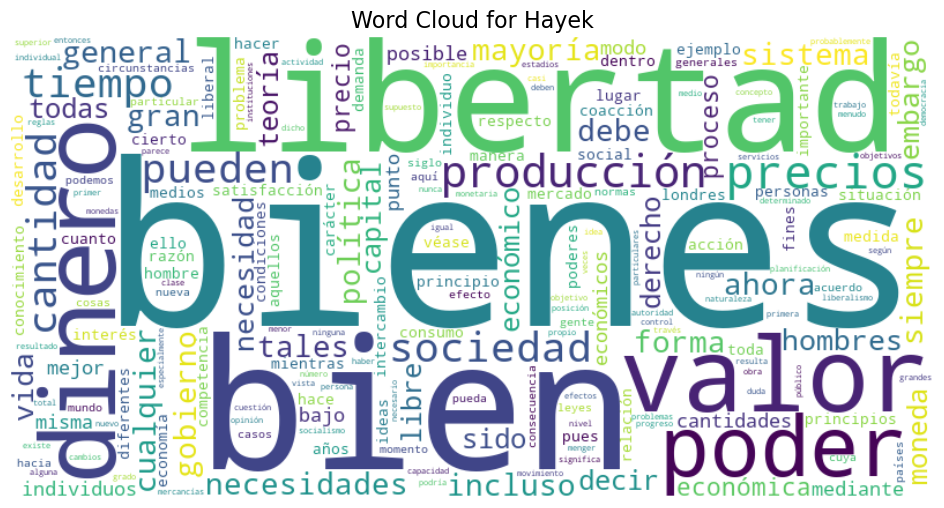

In [146]:
#!pip install wordcloud #instalar si no se lo hizo anteriormente
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Función para generar y mostrar una nube de palabras
def plot_word_cloud(author, important_words):
    # Crear un diccionario con palabras y sus puntuaciones TF-IDF
    word_freq = dict(important_words.get(author, []))
    
    # Crear la nube de palabras
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate_from_frequencies(word_freq)
    
    # Mostrar la nube de palabras
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for {author.capitalize()}", fontsize=16)
    plt.show()

# Generar nubes de palabras para cada autor
for author in important_words:
    plot_word_cloud(author, important_words)


In [200]:
import gensim
from gensim import corpora
from gensim.models.ldamodel import LdaModel

# Paso 1: Preparar el corpus y el diccionario
# Combinar los textos procesados en una sola lista
texts_combined = keynes_texts_processed + hayek_texts_processed

# Crear el diccionario
dictionary = corpora.Dictionary(texts_combined)

# Crear la bolsa de palabras (bag-of-words) para cada texto
corpus = [dictionary.doc2bow(text) for text in texts_combined]

# Paso 2: Entrenar el modelo LDA
num_topics = 8  # Puedes ajustar el número de temas según lo desees
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=25)

# Paso 3: Examinar los temas
topics = lda_model.print_topics(num_words=10)  # Muestra las 10 palabras más importantes por tema
for topic in topics:
    print(topic)

# Para analizar los temas en los textos de Keynes y Hayek, puedes aplicar el modelo LDA
keynes_corpus = [dictionary.doc2bow(text) for text in keynes_texts_processed]
hayek_corpus = [dictionary.doc2bow(text) for text in hayek_texts_processed]

# Obtener la distribución de temas para los textos de Keynes
keynes_topic_distribution = [lda_model.get_document_topics(bow) for bow in keynes_corpus]

# Obtener la distribución de temas para los textos de Hayek
hayek_topic_distribution = [lda_model.get_document_topics(bow) for bow in hayek_corpus]

# Mostrar algunas distribuciones de temas
print("\nDistribución de temas para los primeros textos de Keynes:")
for dist in keynes_topic_distribution[:2]:  # Solo para los primeros dos textos
    print(dist)

print("\nDistribución de temas para los primeros textos de Hayek:")
for dist in hayek_topic_distribution[:2]:  # Solo para los primeros dos textos
    print(dist)


(0, '0.014*"produccion" + 0.010*"bienes" + 0.009*"dinero" + 0.009*"capital" + 0.009*"interes" + 0.009*"tasa" + 0.008*"demanda" + 0.008*"teoria" + 0.007*"inversion" + 0.007*"consumo"')
(1, '0.012*"alemania" + 0.007*"millones" + 0.005*"aliados" + 0.005*"guerra" + 0.005*"parte" + 0.005*"puede" + 0.004*"libras" + 0.004*"tratado" + 0.004*"europa" + 0.004*"francia"')
(2, '0.021*"bienes" + 0.011*"valor" + 0.009*"bien" + 0.008*"necesidades" + 0.006*"cantidad" + 0.006*"satisfaccion" + 0.006*"solo" + 0.006*"cantidades" + 0.006*"tambien" + 0.005*"necesidad"')
(3, '0.015*"dinero" + 0.012*"moneda" + 0.007*"valor" + 0.006*"precios" + 0.006*"monedas" + 0.004*"solo" + 0.004*"gobierno" + 0.004*"puede" + 0.003*"bienes" + 0.003*"cantidad"')
(4, '0.000*"precios" + 0.000*"dinero" + 0.000*"puede" + 0.000*"bienes" + 0.000*"solo" + 0.000*"valor" + 0.000*"mayor" + 0.000*"capital" + 0.000*"poder" + 0.000*"hecho"')
(5, '0.008*"valor" + 0.008*"dinero" + 0.006*"articulo" + 0.006*"cambio" + 0.006*"precios" + 0.004*

Author          object
Text ID          int64
Topic            int64
Probability    float64
dtype: object
   Author  Text ID  Topic  Probability
0  Keynes        0      0     0.547128
1  Keynes        0      6     0.138287
2  Keynes        0      7     0.311984
3  Keynes        1      7     0.999993
4  Keynes        2      0     0.056733


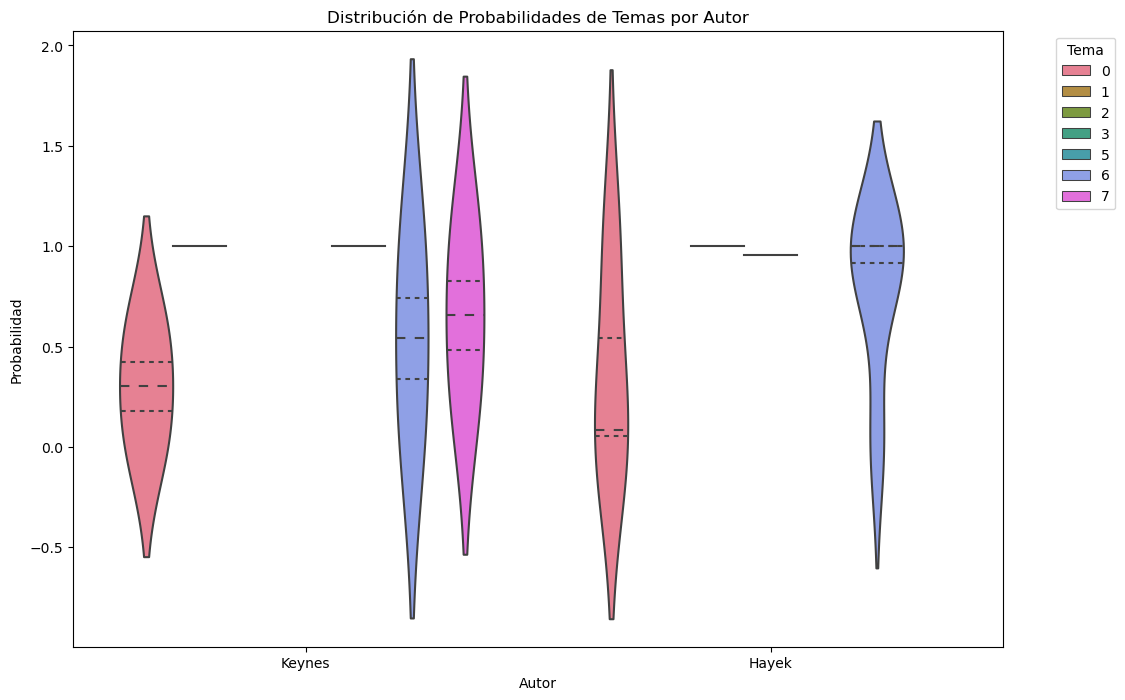

In [202]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Paso 4: Preparar los datos para la visualización
def prepare_data(distribution, author):
    data = []
    for text_id, topics in enumerate(distribution):
        for topic_id, prob in topics:
            data.append({
                'Author': author,
                'Text ID': text_id,
                'Topic': int(topic_id),  # Asegúrate de que el ID del tema sea un entero
                'Probability': float(prob)  # Asegúrate de que la probabilidad sea un flotante
            })
    return data
    
# Crear datos para Keynes y Hayek
keynes_data = prepare_data(keynes_topic_distribution, 'Keynes')
hayek_data = prepare_data(hayek_topic_distribution, 'Hayek')

# Combinar los datos en un solo DataFrame
df = pd.DataFrame(keynes_data + hayek_data)

# Verifica el DataFrame
print(df.dtypes)
print(df.head())

# Definir una paleta de colores para los temas
unique_topics = df['Topic'].unique()
num_topics = len(unique_topics)
palette = sns.color_palette("husl", num_topics)  # Crear una paleta con tantos colores como temas

# Graficar la distribución de probabilidades de temas por autor
plt.figure(figsize=(12, 8))
sns.violinplot(x='Author', y='Probability', hue='Topic', data=df, palette=palette, inner='quartile')
plt.title('Distribución de Probabilidades de Temas por Autor')
plt.xlabel('Autor')
plt.ylabel('Probabilidad')
plt.legend(title='Tema', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Topic          0         1         2         3         5         6         7
Author                                                                      
Hayek   1.105612  0.000000  0.999984  0.956434  0.000000  3.937582  0.000000
Keynes  0.603861  0.999617  0.000000  0.000000  0.999605  1.081353  1.311977


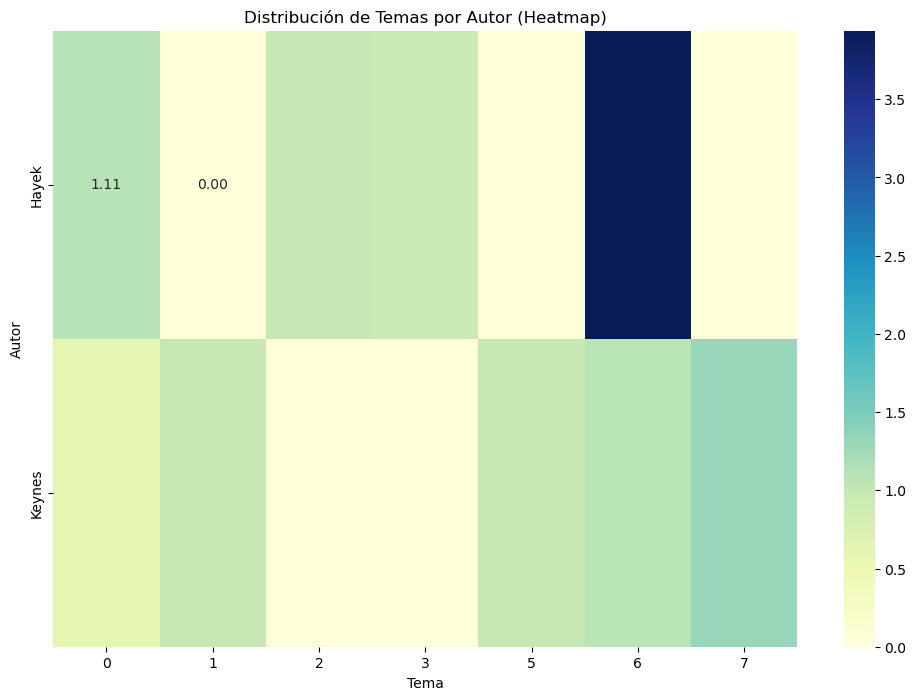

In [204]:
import seaborn as sns
import matplotlib.pyplot as plt

# Paso 1: Preparar los datos para el heatmap por autor
# Agregar una columna para el autor en el DataFrame (esto ya está hecho)
df['Author'] = df['Author']

# Pivotar los datos para el gráfico de calor por autor
heatmap_data_author = df.pivot_table(index='Author', columns='Topic', values='Probability', aggfunc='sum', fill_value=0)

# Imprimir los datos para verificar
print(heatmap_data_author)

# Paso 2: Graficar el heatmap por autor
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data_author, cmap='YlGnBu', annot=True, fmt='.2f')  # annot=True para mostrar los valores
plt.title('Distribución de Temas por Autor (Heatmap)')
plt.xlabel('Tema')
plt.ylabel('Autor')
plt.show()
